In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils.speedup import calculate_speedups

%load_ext autoreload
%autoreload 2

sns.set_theme()

## Read data

In [2]:
threads = 64
sleeping_thresholds = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 20000, 40000, 60000, 80000, 100000]

unfixed_frequency_df = None
fixed_frequency_df = None

for i in range(1, threads + 1):
    for st in sleeping_thresholds:
        filename = '28-06-2022/unfixed-frequency/speedup-binded-{}-threads-{}-us.csv'.format(i, st)
        new_unfixed_freq_df = pd.read_csv(filename)
        new_unfixed_freq_df['threads'] = i
        new_unfixed_freq_df['branch'] = '{}'.format(st)
        unfixed_frequency_df = pd.concat([unfixed_frequency_df, new_unfixed_freq_df], ignore_index = True)
        
        filename = '28-06-2022/fixed-frequency/speedup-binded-{}-threads-{}-us.csv'.format(i, st)
        new_fixed_freq_df = pd.read_csv(filename)
        new_fixed_freq_df['threads'] = i
        new_fixed_freq_df['branch'] = '{}'.format(st)
        fixed_frequency_df = pd.concat([fixed_frequency_df, new_fixed_freq_df], ignore_index = True)

## Calculate speedups and prepare to plot

In [3]:
def plot_speedup(dataframe, detailed=False):
    if detailed is False:
        fig, ax = plt.subplots(1, figsize=(15, 10))
        sns.lineplot(x='cores', y='speedup', hue='branch', data=dataframe);
        ax.set_title(dataframe['name'].values[0]);
        
        ax.annotate('threads = {}'.format(32), \
                xy=(32, 1), xycoords='data', \
                xytext=(32, 1), textcoords='data', \
                arrowprops=dict(facecolor='blue', shrink=0.05))
    else:
        branches = set(dataframe['branch'])
        fig, axs = plt.subplots(len(branches), figsize=(15, 5*len(branches)))

        for i, branch in enumerate(branches):
            branch_to_plot = dataframe[dataframe['branch'] == branch]
            sns.lineplot(x='cores', y='speedup', data=branch_to_plot, ax=axs[i]);
            axs[i].set_title('sleeping duration = {} us'.format(branch))

        plt.tight_layout()
        
speedups_unfixed_freq = calculate_speedups(unfixed_frequency_df)
speedups_unfixed_freq_df = pd.DataFrame(data=speedups_unfixed_freq)

speedups_fixed_freq = calculate_speedups(fixed_frequency_df)
speedups_fixed_freq_df = pd.DataFrame(data=speedups_fixed_freq)

## Plot unfixed frequency speedups

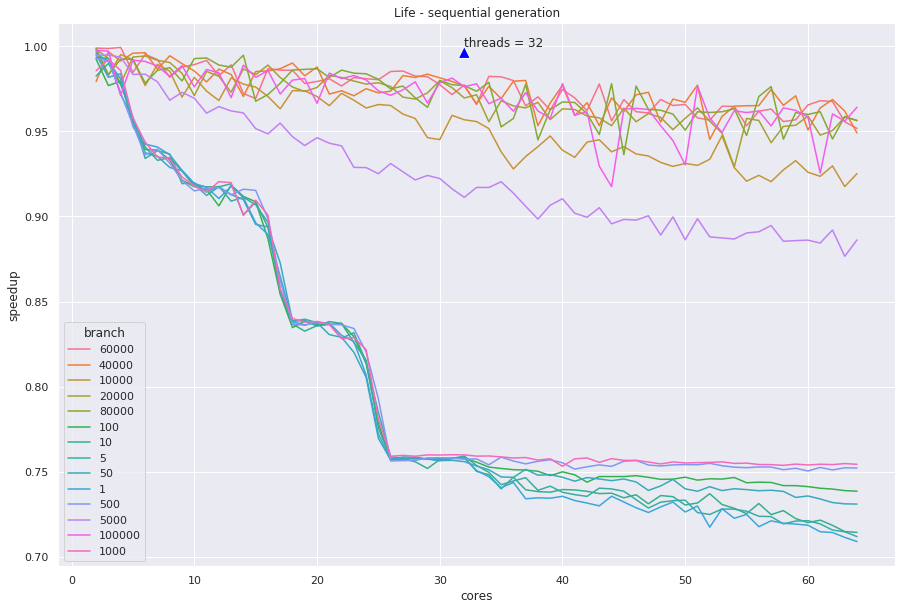

In [4]:
plot_speedup(speedups_unfixed_freq_df)

## Plot fixed frequency speedups

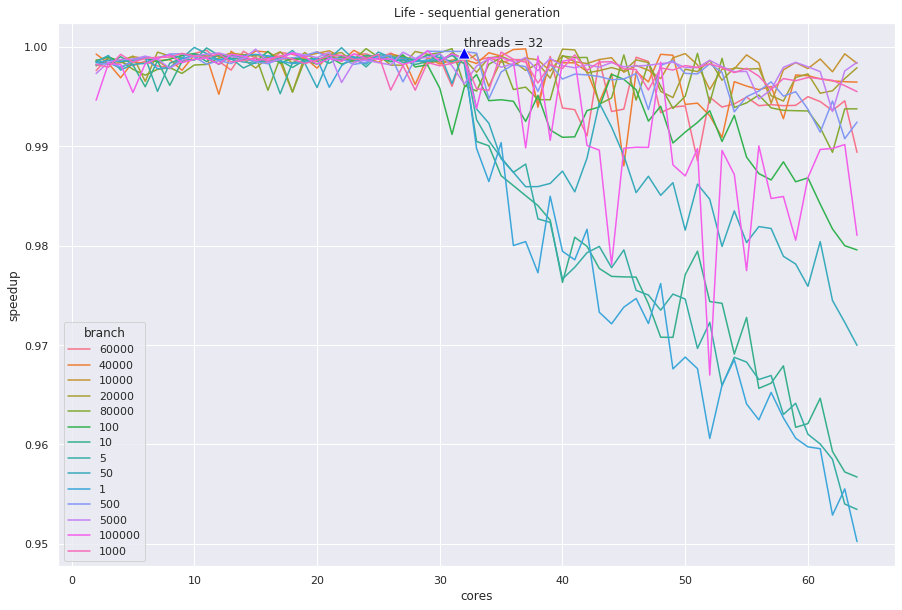

In [5]:
plot_speedup(speedups_fixed_freq_df)

## Conclusion
